In [58]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# Question - 1

In [59]:
# Question 1-a
# dataSet reading from csv file
dataSet=pd.read_csv("Salary_Data.csv")
dataSet.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [73]:
# Question 1-b
# training and testing data splitting using scikit learn library
X = dataSet.iloc[:, :-1].values
Y = dataSet.iloc[:, 1].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=1/3,random_state = 0) # setting the testsubset to 1/3rd of the main dataset

In [61]:
# Question 1-c

#fitting simple linear regression to training subsets
regression = LinearRegression()
regression.fit(X_Train, Y_Train)
#Predicting the test set results
Y_Pred = regression.predict(X_Test)

In [62]:
# Question 1-d

#Calculating the mean_squared error the regression loss using function mean_squared_error from sklearn
mean_squared_error(Y_Test,Y_Pred)

21026037.329511303

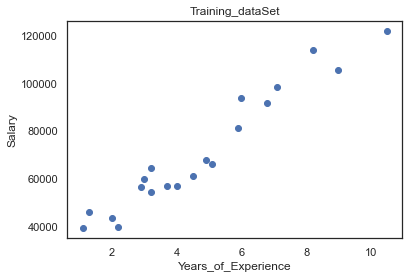

In [74]:
# Question 1-e

#Visualizing the train data using scatter plot
plt.title('Training_dataSet')
plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')
plt.scatter(X_Train, Y_Train)
plt.show()

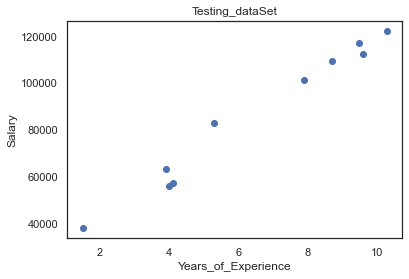

In [64]:
#Visualizing the test data using scatter plot
plt.title('Testing_dataSet')
plt.xlabel('Years_of_Experience')
plt.ylabel('Salary')
plt.scatter(X_Test, Y_Test)
plt.show()

# Question - 2

In [65]:
#reading data from given csv file
dataSet1=pd.read_csv("K-Mean_Dataset.csv")
dataSet1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [66]:
#Question 2-1

#replacing missing values with the mean along the axis using Imputer function in sklearn
X = dataSet1.iloc[:,1:].values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)

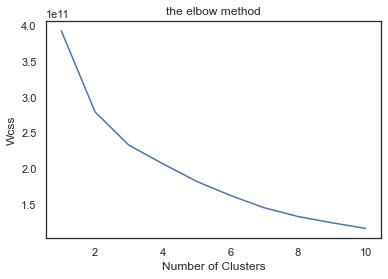

In [67]:
#Question 2-2

#Within Cluster Sum of Squares(WCSS)
#elbow method using k-means algorithm
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show() #displaying the plot

In [68]:
from sklearn.cluster import KMeans
nclusters = 4 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X)

KMeans(n_clusters=4)

In [69]:
#Question 2-3

#used silhouette_score function to calculate the silhouette score with in the cluster
y_cluster_kmeans = km.predict(X)
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print('Silhouette score:',score)

Silhouette score: 0.464450664591727


# Question - 3
Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score? If Yes, can you justify why?

# Answer : 
Yes. A clustering algorithm such as K-means requires feature scaling before feeding it data. In clustering techniques, Euclidean Distance is used to form cohorts. Therefore, without scaling features, the algorithm may favor features with larger magnitudes. We therefore scale features to bring them all into the same range, which makes the model use each feature more effectively.

In [70]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array)

In [71]:
from sklearn.cluster import KMeans
nclusters = 4 
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)

KMeans(n_clusters=4)

In [75]:
y_scaled_cluster_kmeans = km.predict(X_scaled)
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_scaled_cluster_kmeans)
print('Silhouette score after applying scaling:',score)

Silhouette score after applying scaling: 0.1976074492720698
